In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler



In [2]:
train_dir = "train" 
test_dir = "test"

In [3]:
import os
def countimg(der):
    for data in sorted(os.listdir(der)):
        c_path = os.path.join(der, data)
        if os.path.isdir(c_path):
            count =[f for f in os.listdir(c_path)
                if f.lower().endswith(('.jpg','.jpeg','.png'))]
        print(f"{data}: {len(count)} images")    

countimg(train_dir)

angry: 3995 images
disgust: 436 images
fear: 4097 images
happy: 7215 images
neutral: 4965 images
sad: 4830 images
surprise: 3171 images


In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
from matplotlib.cbook import flatten
from sklearn import metrics


model = Sequential([
    Conv2D(64,(3,3), activation='relu', input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.2),

    Conv2D(128,(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.5),

    Conv2D(256,(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Flatten(),

    #neural network
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    #output layer
    Dense(7, activation='softmax')

])

model.compile(optimizer = Adam(learning_rate=0.1), loss= 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\interviewProjects\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,474,759 (9.44 MB)

 Trainable params: 2,472,839 (9.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [7]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
learn_shedule = ReduceLROnPlateau(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_gen,
    epochs = 2
    0,
    validation_data = test_gen,
    callbacks = [earlyStopping, learn_shedule]
)

Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 297s 661ms/step - accuracy: 0.3605 - loss: 1.6326 - val_accuracy: 0.3823 - val_loss: 1511.4396 - learning_rate: 1.0000e-03
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 55s 123ms/step - accuracy: 0.3592 - loss: 1.6273 - val_accuracy: 0.3792 - val_loss: 3678.1458 - learning_rate: 1.0000e-03
Epoch 3/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 55s 123ms/step - accuracy: 0.3590 - loss: 1.6240 - val_accuracy: 0.3879 - val_loss: 475.4393 - learning_rate: 1.0000e-03
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 59s 131ms/step - accuracy: 0.3601 - loss: 1.6228 - val_accuracy: 0.3911 - val_loss: 4639.0864 - learning_rate: 1.0000e-03
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 60s 134ms/step - accuracy: 0.3616 - loss: 1.6186 - val_accuracy: 0.3938 - val_loss: 2060.6646 - learning_rate: 1.0000e-03
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 58s 129ms/step - accuracy: 0.3654 - loss: 1.6142 - val_accuracy: 0.4047 - val_loss: 53.1210 - learning_rate: 1.0000e-03
Epoch 7/20
449/449 ━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step 
              precision    recall  f1-score   support

           0       0.33      0.12      0.18         8
           2       0.00      0.00      0.00         7
           3       0.37      0.77      0.50        13
           4       0.29      0.29      0.29        14
           5       0.25      0.09      0.13        11
           6       0.50      0.45      0.48        11

    accuracy                           0.33        64
   macro avg       0.29      0.29      0.26        64
weighted avg       0.31      0.33      0.29        64



<Axes: >

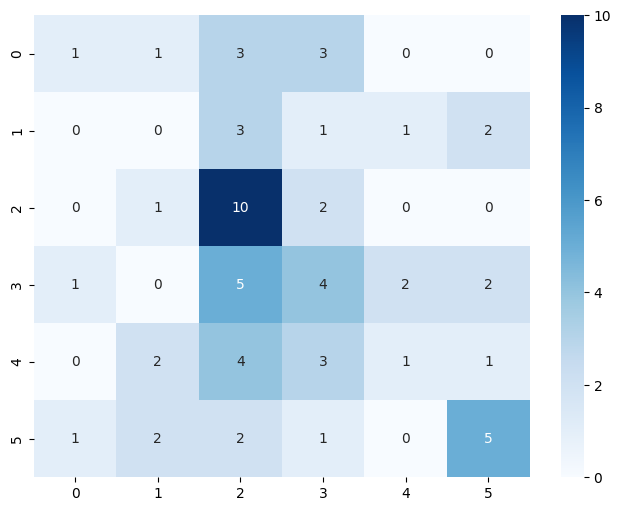

In [8]:
from sklearn.metrics import classification_report, confusion_matrix


test_img, test_label = next(test_gen)

prediction = model.predict(test_img)

y_true = np.argmax(test_label, axis=1)
y_pred = np.argmax(prediction, axis=1)

print(classification_report(y_true, y_pred))   #target_name = class_name

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [9]:
class_names = list(train_gen.class_indices.keys())

<>:24: SyntaxWarning: invalid escape sequence '\i'
<>:24: SyntaxWarning: invalid escape sequence '\i'
C:\Users\HP\AppData\Local\Temp\ipykernel_4412\3540170646.py:24: SyntaxWarning: invalid escape sequence '\i'
  predicted_emotion, confidence = detect_emotion('C:\interviewProjects\pexels-pixabay-47080.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


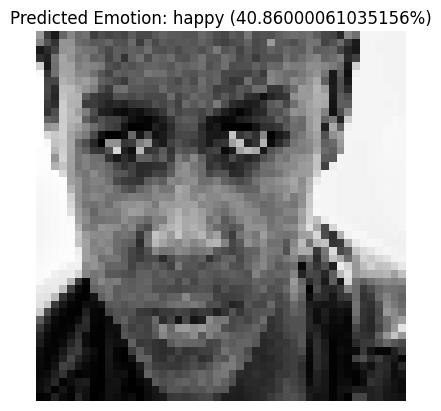

Emotion: happy, Confidence: 40.86000061035156%


In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def detect_emotion(image_path):
    img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    confidence = round(prediction[0][predicted_index] * 100, 2)  # Confidence in %

    # Display the image with the predicted label and confidence
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted Emotion: {predicted_class} ({confidence}%)')
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

# Example Detection
predicted_emotion, confidence = detect_emotion('C:\interviewProjects\pexels-pixabay-47080.jpg')
print(f"Emotion: {predicted_emotion}, Confidence: {confidence}%")